# Predicting Covid-19 Cases, fatalities for India and the World

In [1]:
# Import useful libraries and functions
import pandas as pd
import numpy as np
# Converting Dates into usable form like ordinal.
from datetime import datetime as dt
# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# For Regression, Pre-processing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
# Read entire world statistics data into a data frame
df = pd.read_csv('data.csv')
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
# Convert all dates into ordinal format
dates = df['Date']
i = 0
for a in dates:
    dates[i] = dt.strptime(a, '%Y-%m-%d').date()
    dates[i] = dates[i].toordinal()
    i = i+1

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
df['Date'] = dates
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,737446,Afghanistan,0,0,0
1,737446,Albania,0,0,0
2,737446,Algeria,0,0,0
3,737446,Andorra,0,0,0
4,737446,Angola,0,0,0


# India

## Add all data for India into a dataframe

In [5]:
ind_data = df[df['Country']=='India']
ind_data.head()

,Date,Country,Confirmed,Recovered,Deaths
79,737446,India,0,0,0
267,737447,India,0,0,0
455,737448,India,0,0,0
643,737449,India,0,0,0
831,737450,India,0,0,0


## Plot the cases data

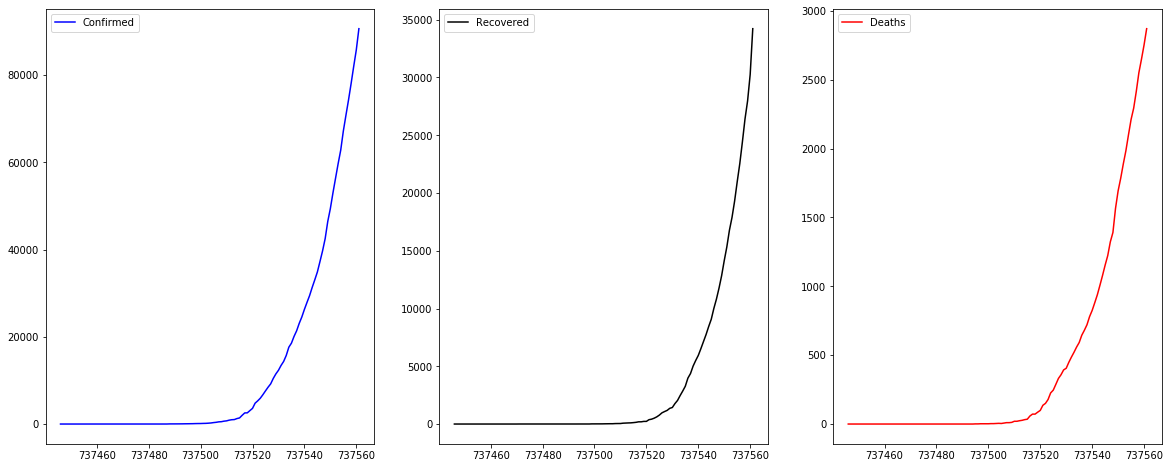

In [6]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,3,1)
ax1.plot(ind_data['Date'].values,ind_data['Confirmed'].values,color='b')
ax1.legend(['Confirmed'])
ax2 = fig.add_subplot(1,3,2)
ax2.plot(ind_data['Date'].values,ind_data['Recovered'].values,color='k')
ax2.legend(['Recovered'])
ax3 = fig.add_subplot(1,3,3)
ax3.plot(ind_data['Date'].values,ind_data['Deaths'].values,color='r')
ax3.legend(['Deaths'])

### All the three quantities seem to be increasing exponentially

## To fit the curves we will fit dates with the log of them using polynomial Regression

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


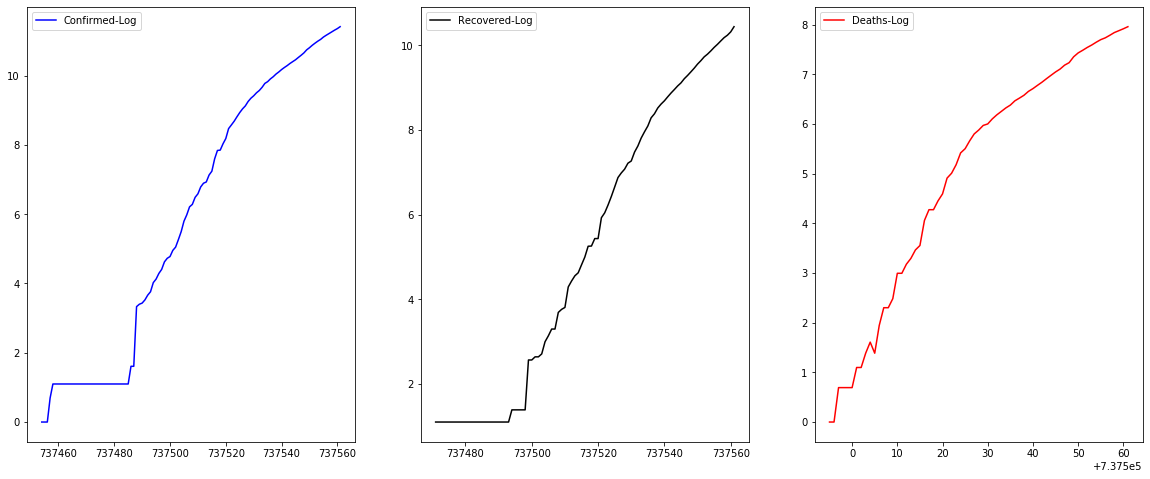

In [7]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,3,1)
ax1.plot(ind_data['Date'].values,np.log(ind_data['Confirmed'].values),color='b')
ax1.legend(['Confirmed-Log'])
ax2 = fig.add_subplot(1,3,2)
ax2.plot(ind_data['Date'].values,np.log(ind_data['Recovered'].values),color='k')
ax2.legend(['Recovered-Log'])
ax3 = fig.add_subplot(1,3,3)
ax3.plot(ind_data['Date'].values,np.log(ind_data['Deaths'].values),color='r')
ax3.legend(['Deaths-Log'])

## Applying regression for Confirmed cases

### As the log of the values is being used we remove the 0 values

In [8]:
# Copy the Date and Confirmed Values of India into another dataframe
conf_data = ind_data[['Date','Confirmed']]
# Replace all zeroes with ''
conf_data.replace(0,np.nan,inplace=True)
conf_data.dropna(axis=0,inplace=True)
conf_data.head()

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,Confirmed
1583,737454,1.0
1771,737455,1.0
1959,737456,1.0
2147,737457,2.0
2335,737458,3.0


In [9]:
x_conf = conf_data['Date'].values
y_conf = conf_data['Confirmed'].values

In [48]:
scale = StandardScaler()
x_norm = scale.fit_transform(x_conf.reshape(-1,1))

In [51]:
# Y data is considered as log(y_conf)
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_norm.reshape(-1,1),np.log(y_conf),test_size=0.2)

0.9601064634208588
0.9605074032379556
0.9858944095316619
0.9878073492587325
0.9911701974278478
0.9945811388195589


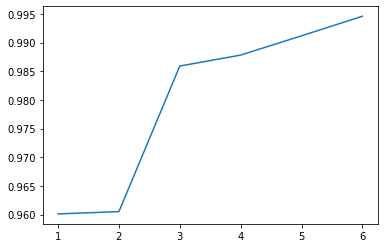

In [52]:
max_degree = 6
i=1
r_squared = []
while i<=max_degree:
    p = PolynomialFeatures(degree = i,include_bias=False)
    x_train11 = p.fit_transform(x_train1)
    x_test11 = p.fit_transform(x_test1)
    l = LinearRegression()
    l.fit(x_train11,y_train1.reshape(-1,1))
    y_pred1 = l.predict(x_test11)
    r_squared.append(r2_score(y_test1,y_pred1))
    print(r2_score(y_test1,y_pred1))
    i=i+1
plt.plot(np.arange(1,max_degree+1,1),r_squared)

### To prevent underfitting and overfitting, the point where the graph starts to flatten is to be considered, i.e 3 degree polynomial is the best fit.

In [53]:
ind_conf_model = LinearRegression()
p = PolynomialFeatures(degree = 3,include_bias=False)
x_input = p.fit_transform(x_norm)
ind_conf_model.fit(x_norm,np.log(y_conf))
ind_conf_model.score(x_norm,np.log(y_conf))

0.9634454188237281

### In-sample accuracy of the model is 96.34%

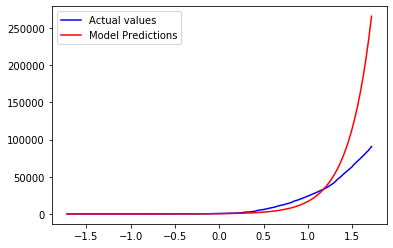

In [57]:
y_pred = ind_conf_model.predict(x_norm)
plt.plot(x_norm,y_conf,color='b')
plt.plot(x_norm,np.exp(y_pred),'b-',color='r')
plt.legend(['Actual values','Model Predictions'])

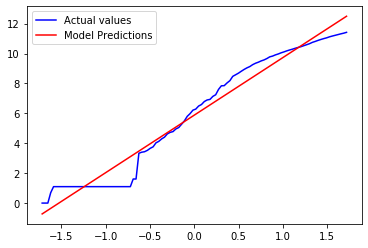

In [58]:
plt.plot(x_norm,np.log(y_conf),color='b')
plt.plot(x_norm,y_pred,'b-',color='r')
plt.legend(['Actual values','Model Predictions'])